*Imports and Helping Functions*

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.decomposition import PCA
import time
def GetGaussianData(instances= 100,features = 4):
    data = np.random.normal(loc=1, scale=2, size= (instances, features))
    sns.distplot(data, hist=False)
    plt.show()
    return data
def GetChiSquareData(instances = 100,features= 4):
    data = np.random.chisquare(df = 4, size= (instances, features))
    sns.distplot(data, hist=False)
    plt.show()
    return data
def GenerateData(Instances, features):
    GaussianData = GetGaussianData(Instances,features)
    ChiData = GetChiSquareData(Instances,features)
    Shuffled_Data = np.concatenate((GaussianData,ChiData))
    np.random.shuffle(Shuffled_Data)
    return [GaussianData, ChiData,Shuffled_Data]

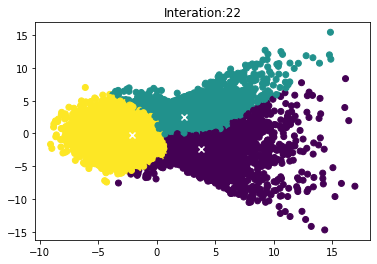

In [227]:
class KMean:
    def __init__(self, K=3, Data=None, epochs=100):
        if Data.shape[1] < 2:
            raise Exception('Data must have at least 2 features') # Because of the PCA and plotting data, features must be atleast 2
        elif K < 1:
            raise Exception('K must be greater than 1')
        elif epochs < 1:
            raise Exception('Epochs must be greater than 1')
        else:
            self.K = K
            self.Data = Data
            self.epochs = epochs
            self.pca = PCA(n_components=2) #Saving PCA for later use
            self.data_2d = self.pca.fit_transform(self.Data) #Saving 2D data generated by the PCA transform to reduce the computation.
    def Initialize_Centroids(self): # Initializing random centroids from the data.
        samples = self.Data.shape[0]
        indices = np.random.choice(samples, size=self.K, replace=False) # Random indices for centroids
        centroids = self.Data[indices]
        return centroids.reshape(self.Data.shape[1],self.K).T
    def CalculateDistances(self, centroids):
        distances = []
        for x in centroids:
            distance = np.sqrt((self.Data-x)**2).sum(axis=1) #Using L2 or Euclidean distance to calculate the distance between centroids and data points.
            distances.append(distance)
        return np.array(distances).T #Converting the distances into required shape.
    def GetLabelsByDistance(self, Distances):
        return np.argmin(Distances, axis= 1) #Finding labels by sorting distances
    def CalculateMean(self, Data_Groups):
        Data_Groups = np.array(Data_Groups)
        ret = []
        for x in Data_Groups:
            Mean = np.mean(x, axis=0) # Mean for each data group.
            ret.append(Mean)
        return np.array(ret)
    def UpdateCentroids(self, labels):
        Data_Groups = []
        for i in range(self.K):
            ind = np.where(labels == i)[0]
            Data_Groups.append(self.Data[ind]) # Grouping Data by Labels, if there are 3 clusters then the number of groups is also 3. 
        return self.CalculateMean(Data_Groups) # Calculating Mean to update the values of centroids.
    def Plot(self, centroids,labels, iteration):
        centroids_2d = self.pca.transform(centroids) #Using PCA transform to transform the centroids into 2D data to plot.
        clear_output(wait=True)
        plt.title(f"Interation:{iteration}")
        plt.scatter(x = self.data_2d[:,0], y = self.data_2d[:,1],c=labels) #Plotting 2D data
        plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1],c='white',marker='x') #plotting 2D centroids
        plt.show()
    def startAlgo(self):
        centroids = self.Initialize_Centroids() #Initializing random centroids
        old_centroids = [] # Saving old centroids to check the convergence of centroids
        i = 0 
        while (i < self.epochs) and not np.array_equal(old_centroids,centroids): #checking if epochs are completed along with the convergence check of centroids
            old_centroids = centroids # saving old centroids to check the convergence
            Distances = self.CalculateDistances(centroids); 
            labels = self.GetLabelsByDistance(Distances)
            centroids = self.UpdateCentroids(labels)
            self.Plot(centroids, labels,i)
            i+=1



Driver Code for K-Means Model and Data Generation.

In [ ]:

if __name__ == '__main__':
    Instances = 10000 # Number of instances (rows) in dataset
    features = 2 # Number of features (columns) in dataset
    K = 3 #No. of Clusters 
    All_Data = GenerateData(Instances=Instances, features=features) # Generating the required Data for algorithm
    #Data Choices:
    GaussianData = All_Data[0] # Saving the Gaussian Data for algorithm (in case if this is the only data we want to use)
    ChiData = All_Data[1] # Saving the Chi Data for algorithm (in case if this is the only data we want to use)
    Shuffled_Data = All_Data[2] # Saving the Shuffled Data for algorithm (in case if this is the only data we want to use)
    km = KMean(K=K,Data=Shuffled_Data,epochs=100)
    km.startAlgo()